# Case
Como parte do nosso processo seletivo para Cientista de Dados Júnior, desenvolvemos um estudo de caso que permitirá avaliar suas habilidades práticas em ciência de dados. Este desafio foi inspirado em cases existentes na área e utiliza um conjunto de dados disponível no Kaggle.

**Objetivo do Case:**

Você será responsável por analisar um conjunto de dados de transações financeiras para identificar padrões que possam indicar atividades fraudulentas. O objetivo é desenvolver um modelo preditivo capaz de classificar transações como fraudulentas ou legítimas.

**Conjunto de Dados:**

Utilizaremos o conjunto de dados "Credit Card Fraud Detection" disponível no Kaggle. Este dataset contém transações realizadas com cartões de crédito na Europa ao longo de dois dias em setembro de 2013. Das 284.807 transações, 492 foram identificadas como fraudulentas. Os dados estão altamente desbalanceados, com a classe positiva (fraude) representando 0,172% de todas as transações. As características foram transformadas usando PCA, exceto pelas variáveis 'Time' e 'Amount'.

**Link para o Dataset:**

[Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

**Tarefas e Perguntas:**

1. **Análise Exploratória de Dados (EDA):**
   - Realize uma análise exploratória detalhada dos dados.
   - Identifique padrões, distribuições e possíveis anomalias.
   - Visualize a distribuição das classes e discuta o desbalanceamento dos dados.

2. **Pré-processamento de Dados:**
   - Descreva as etapas de limpeza e preparação dos dados para modelagem.
   - Considere técnicas para lidar com o desbalanceamento das classes, como sobremostragem, subamostragem ou uso de algoritmos específicos.

3. **Desenvolvimento do Modelo Preditivo:**
   - Construa pelo menos dois modelos de machine learning para a detecção de fraudes.
   - Compare o desempenho dos modelos utilizando métricas apropriadas, como AUC-ROC, precisão, recall e F1-score.
   - Discuta as vantagens e desvantagens de cada modelo no contexto do problema.

4. **Validação e Teste:**
   - Explique como você validou os modelos (por exemplo, validação cruzada).
   - Apresente os resultados nos dados de teste e interprete-os.
   - Discuta qualquer evidência de overfitting ou underfitting e como isso foi abordado.

5. **Implementação e Considerações Finais:**
   - Sugira como o modelo poderia ser implementado em um ambiente de produção.
   - Considere aspectos como desempenho em tempo real, atualizações do modelo e monitoramento contínuo.
   - Discuta possíveis implicações éticas e de privacidade relacionadas à detecção de fraudes.

**Entrega:**

Por favor, compile suas análises, códigos e conclusões em um relatório estruturado em formato PDF. Inclua visualizações e gráficos que suportem suas descobertas. Envie o relatório juntamente com o código-fonte utilizado para nossa avaliação.

Estamos ansiosos para ver sua abordagem e soluções para este desafio. Boa sorte! 



In [1]:
# Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. **Análise Exploratória de Dados (EDA):**
   - Realize uma análise exploratória detalhada dos dados.
   - Identifique padrões, distribuições e possíveis anomalias.
   - Visualize a distribuição das classes e discuta o desbalanceamento dos dados.

In [2]:
fraud_dataset = pd.read_csv('./creditcard.csv')

In [3]:
fraud_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checando por valores nulos no dataset

* dataset.isna().sum()

In [4]:
fraud_dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Nenhum dado nulo no dataset, perfeito, menos uma preocupação

### Checando a proporção das classes

* Class = 0, Transação Legítima
* Class = 1, Transação Fraudulenta

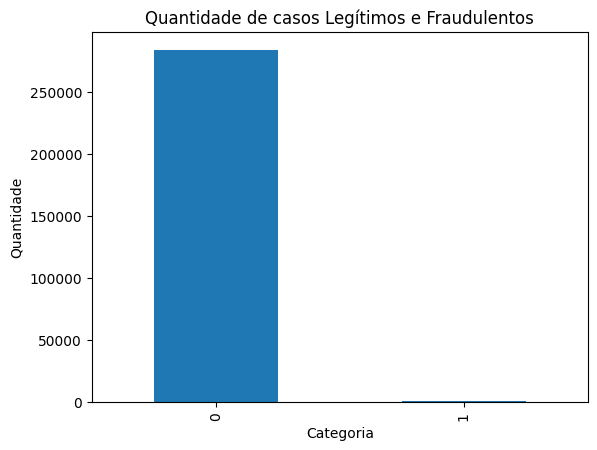

In [5]:
# 1 Opção, checar a distribuição visualmente
chart = fraud_dataset['Class'].value_counts()

chart.plot(kind = 'bar')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Quantidade de casos Legítimos e Fraudulentos')
plt.show()

### Problema de Visualização

A vizualização não está muito boa mas existe uma discrepância imensa entre os valores

* Vamos vizualizar de outra maneira, percentualmente

In [6]:
def get_proportion(data, column, values_to_search):
    result_list = []
    result_dict = {}  
    for i in values_to_search:
        result = data[column].value_counts().get(i)
        result_list.append(result)
    for j in values_to_search:
        proportion = 100*(result_list[j]/sum(result_list))
        result_dict.update({values_to_search[j]: round(proportion, 2)})

        
    dataframe_proportions = pd.DataFrame(list(result_dict.items()), columns = ['Valores', 'Proporções']) 
    return dataframe_proportions     
    


In [7]:
proporcoes = get_proportion(fraud_dataset, 'Class', [0,1])
proporcoes["Valores"] = np.where(proporcoes["Valores"] == 0, 'Legítimo', 'Fraude')
proporcoes.head()

,Valores,Proporções
0,Legítimo,99.83
1,Fraude,0.17


### MEU DEUS!

Que diferença absurda de proporção, mas vamos la:

1. Primeiro criamos uma função que pode ser usada depois com duas variáveis alvo.
2. Depois trocamos o nome do nosso resultado de 0 para Legítimo e 1 para Fraude, para uma melhor visualização usando a função:
    ```Python
    np.where(dataframe[coluna] == busca, valor_substituto, else)
    ```
3. E conseguimos descobrir a diferença absurda de proporções, onde:
    * 99.83% de todos os casos são transações legítimas;
    * 0.17% dos casos são fraudes.

E isso não deveria ser ótimo?
Claro, para o nosso negócio quanto mais próximo de 0 os casos de fraude, melhor para nós.

No entando para nós isso também é bem ruim, isso se deve ao fato de que será praticamente inviável treinar um modelo para **prever** novas fraudes com um dataset **Extremamente** desbalanceado.

**Para anotar**: Devemos realizar futuramente um balanceamento do dataset, antes de treinar o nosso modelo.

### Gráfico de correlação

Para poder visualizar se existe correlação entre nossa variável alvo podemos utilizar do heatmap do seaborn, passando dados de corr.

1. ```Python
    import seaborn as sns

2. Utilizar o método do pandas **corr** para encontrar a correlação entre as variáveis dos dados.
    ```Python
        corr_data = data.corr(method = ({‘pearson’, ‘kendall’, ‘spearman’} or callable))

3. Criar nosso heatmap de correlação
    ```Python
        sns.heatmap(corr_data)

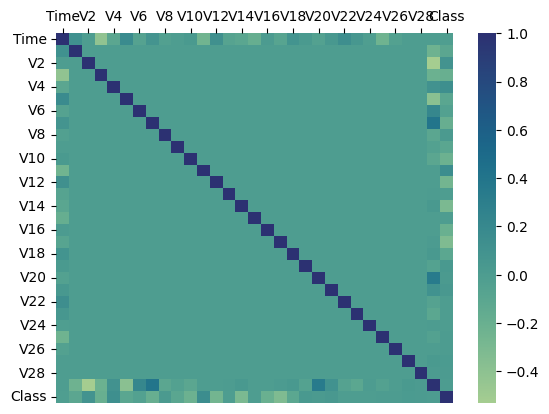

In [8]:
import seaborn as sns

corr_data = fraud_dataset.corr()

ax = sns.heatmap(corr_data, cmap="crest")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

### Não vejo nada!

Realmente, esse mapa de correlação é muito dificil de intepretar com tantas colunas, vamos tentar outra abordagem.

O que podemos fazer é calcular o **Coeficiente de Correlação** e mostrar cada um deles em relação a variável alvo.

1. Criamos uma iteração pegando cada coluna do nosso dataset;
2. Calculamos o coeficiente da seguinte forma:
    ```Python
        coef = np.corrcoef(data[coluna], data[coluna_alvo])[0,1]
3. Colocamos uma condição para printar o coeficiente de todas colunas que não sejam a alvo:
    ```Python
        if coluna != 'Alvo':
            print(f'Coeficiente de Correlação de {i} X Alvo: {coef:.3f}')
        else:
            continue


In [9]:
# def get_coef(data, alvo, limite=[-0.01, 0.01], ascending = False):
#     """
#     Calcula o coeficiente de correlação entre as colunas de um DataFrame e uma variável alvo.

#     Parâmetros:
#     -----------
#     data : pandas.DataFrame
#         O DataFrame contendo os dados.
#     alvo : str
#         O nome da variável alvo para calcular a correlação.
#     limite : list, opcional
#         Lista com dois valores que definem o limite de correlação considerada significativa.

#     Retorna:
#     --------
#     pandas.DataFrame
#         DataFrame com as colunas que possuem correlação fora dos limites estabelecidos.

#     Levanta:
#     --------
#     ValueError
#         Se nenhuma coluna satisfizer os critérios de correlação.
#     """
#     if alvo not in data.columns:
#         raise ValueError(f"A variável alvo '{alvo}' não está presente no DataFrame.")

#     corr_dict = {}
#     for i in data.columns:
#         if i == alvo:
#             continue
#         coef = np.corrcoef(data[i], data[alvo])[0, 1]
#         if coef <= limite[0] or coef >= limite[1]:
#             corr_dict.update({i: round(coef, 3)})

#     if len(corr_dict) == 0:
#         raise ValueError("Ajuste seu Limite: Nenhuma correlação encontrada dentro dos critérios.")
#     else:
#         dataframe_corr = pd.DataFrame(list(corr_dict.items()), columns = ['Valores', 'Coeficiente de Correlação'])

#     if ascending == False:
#         dataframe_corr = dataframe_corr.sort_values('Coeficiente de Correlação', ignore_index = True, ascending = False)
#     else:
#         dataframe_corr = dataframe_corr.sort_values('Coeficiente de Correlação', ignore_index = True, ascending = True)


#     # Exibir o resultado antes de retornar
#     print(f"\n📊 Resultado da Análise de Correlação, Coluna alvo: {alvo}")


#     return dataframe_corr


In [10]:
from coef_analysis import get_coef
corr_data = get_coef(fraud_dataset, 'Class', [-0.187, 0.1])
print(corr_data)


📊 Resultado da Análise de Correlação, Coluna alvo: Class
  Colunas  Coeficiente de Correlação
0     V11                      0.155
1      V4                      0.133
2      V7                     -0.187
3      V3                     -0.193
4     V16                     -0.197
5     V10                     -0.217
6     V12                     -0.261
7     V14                     -0.303
8     V17                     -0.326
